Import modules we need and read in the data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
import warnings
warnings.filterwarnings("ignore")

data1 = pd.read_csv("../../resource/ModelCreation/worldVaccinesCleanSimple.csv")
data1

,country,date,people_fully_vaccinated_per_hundred
0,Africa,2021-02-03,0.00
1,Africa,2021-02-04,0.00
2,Africa,2021-02-05,0.00
3,Africa,2021-02-06,0.00
4,Africa,2021-02-08,0.00
...,...,...,...
10664,Zimbabwe,2021-06-30,3.74
10665,Zimbabwe,2021-07-01,3.76
10666,Zimbabwe,2021-07-02,3.80
10667,Zimbabwe,2021-07-03,3.82


First convert the date column from a string to a datetime, then change that datetime into a timedelta

In [2]:
data1.date = pd.to_datetime(data1.date,format="%Y-%m-%d") # Convert date strings to datetime objects
mindate1 = data1.date.min() # Save min for when we take in input
data1.date = data1.date - data1.date.min()
data1

,country,date,people_fully_vaccinated_per_hundred
0,Africa,54 days,0.00
1,Africa,55 days,0.00
2,Africa,56 days,0.00
3,Africa,57 days,0.00
4,Africa,59 days,0.00
...,...,...,...
10664,Zimbabwe,201 days,3.74
10665,Zimbabwe,202 days,3.76
10666,Zimbabwe,203 days,3.80
10667,Zimbabwe,204 days,3.82


Next, convert these timedeltas into integers (number of days since the first entry)

In [3]:
data1.date = pd.Series([x.days for x in data1.date])
data1

,country,date,people_fully_vaccinated_per_hundred
0,Africa,54,0.00
1,Africa,55,0.00
2,Africa,56,0.00
3,Africa,57,0.00
4,Africa,59,0.00
...,...,...,...
10664,Zimbabwe,201,3.74
10665,Zimbabwe,202,3.76
10666,Zimbabwe,203,3.80
10667,Zimbabwe,204,3.82


Convert this data into a dictionary of value with a dataFrame corresponding to the country as the key

In [4]:
datadict1 = dict()
for c in data1.country.unique():
    tmpdata = data1.loc[data1.country==c] # Get the data where the country column equals the certain country
    tmpdata.drop("country",axis=1,inplace=True) # Drop the country column because this value will be the same for this table
    datadict1[c] = {"data":tmpdata} # Set the value for the key at country c to be the data we just extracted
datadict1["United States"]["data"] # Show the data for the US to just make sure it worked as intended

,date,people_fully_vaccinated_per_hundred
9860,34,0.40
9861,35,0.48
9862,39,0.60
9863,40,0.65
9864,41,0.72
...,...,...
10022,201,46.31
10023,202,46.61
10024,203,46.72
10025,204,46.94


This data is ready to be used in a model.

Read csv corresponding to our second model

In [5]:
data2 = pd.read_csv("../../resource/ModelCreation/worldVaccinesClean2WeeksLater.csv")
data2

,country,date,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred_2
0,Africa,2021-02-03,0.00,0.00,34.0,0.00
1,Africa,2021-02-04,0.00,0.00,39.0,0.00
2,Africa,2021-02-05,0.00,0.00,44.0,0.00
3,Africa,2021-02-06,0.00,0.00,41.0,0.00
4,Africa,2021-02-08,0.00,0.00,38.0,0.01
...,...,...,...,...,...,...
8077,World,2021-06-17,21.40,9.78,4601.0,11.11
8078,World,2021-06-18,21.56,9.87,4724.0,11.19
8079,World,2021-06-19,21.69,9.94,4859.0,11.30
8080,World,2021-06-20,21.84,10.02,4982.0,11.39


Let's convert the datetime into a timedelta

In [6]:
data2.date = pd.to_datetime(data2.date,format="%Y-%m-%d") # Convert date strings to datetime objects
mindate2 = data2.date.min() # Save min for when we take in input
data2.date = data2.date - data2.date.min()
data2

,country,date,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred_2
0,Africa,54 days,0.00,0.00,34.0,0.00
1,Africa,55 days,0.00,0.00,39.0,0.00
2,Africa,56 days,0.00,0.00,44.0,0.00
3,Africa,57 days,0.00,0.00,41.0,0.00
4,Africa,59 days,0.00,0.00,38.0,0.01
...,...,...,...,...,...,...
8077,World,188 days,21.40,9.78,4601.0,11.11
8078,World,189 days,21.56,9.87,4724.0,11.19
8079,World,190 days,21.69,9.94,4859.0,11.30
8080,World,191 days,21.84,10.02,4982.0,11.39


Change the timedelta into just an integer

In [7]:
data2.date = pd.Series([x.days for x in data2.date])
data2

,country,date,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred_2
0,Africa,54,0.00,0.00,34.0,0.00
1,Africa,55,0.00,0.00,39.0,0.00
2,Africa,56,0.00,0.00,44.0,0.00
3,Africa,57,0.00,0.00,41.0,0.00
4,Africa,59,0.00,0.00,38.0,0.01
...,...,...,...,...,...,...
8077,World,188,21.40,9.78,4601.0,11.11
8078,World,189,21.56,9.87,4724.0,11.19
8079,World,190,21.69,9.94,4859.0,11.30
8080,World,191,21.84,10.02,4982.0,11.39


Let's isolate just one country

In [8]:
datagraph = data2.loc[data2.country=="United States"]
datagraph.drop("country",axis=1,inplace=True)
datagraph

,date,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred_2
7436,34,2.90,0.40,2234.0,1.27
7437,35,3.17,0.48,2388.0,1.43
7438,39,4.07,0.60,2725.0,1.81
7439,40,4.27,0.65,2668.0,1.92
7440,41,4.50,0.72,2733.0,2.07
...,...,...,...,...,...
7582,187,52.34,43.79,3486.0,46.31
7583,188,52.59,44.18,3965.0,46.61
7584,189,52.71,44.39,4075.0,46.72
7585,190,52.85,44.59,3847.0,46.94


Now, I'm going to graph this data to see how it looks

<AxesSubplot:>

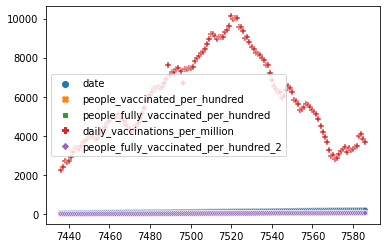

In [9]:
sns.scatterplot(data=datagraph)

We can see that daily vaccinations per million is completely overshadowing the other values. Let's see what happens when we remove it

<AxesSubplot:>

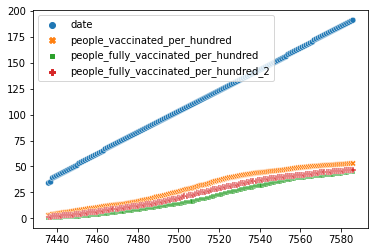

In [10]:
sns.scatterplot(data=datagraph.drop("daily_vaccinations_per_million",axis=1))

We can see that this graph looks much better where none of the features is being overshadowed by another. We want this for all of our features, so we need to change the scale of the daily vaccinations per million column.

I am going to scale dates because as we add more data, the days since the first recorded date will increase and evnetually we will need to scale anyways.

In [11]:
date_scaler = MinMaxScaler(feature_range=(0,100))
data2.date = date_scaler.fit_transform(np.array(data2.date).reshape(-1,1))
data2

,country,date,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred_2
0,Africa,28.125000,0.00,0.00,34.0,0.00
1,Africa,28.645833,0.00,0.00,39.0,0.00
2,Africa,29.166667,0.00,0.00,44.0,0.00
3,Africa,29.687500,0.00,0.00,41.0,0.00
4,Africa,30.729167,0.00,0.00,38.0,0.01
...,...,...,...,...,...,...
8077,World,97.916667,21.40,9.78,4601.0,11.11
8078,World,98.437500,21.56,9.87,4724.0,11.19
8079,World,98.958333,21.69,9.94,4859.0,11.30
8080,World,99.479167,21.84,10.02,4982.0,11.39


First I create a function that takes data from a certain country and scales the daily vaccinations per million column, returns this scaled data, and the scaler

In [12]:
def scale2(data):
    scaler = MinMaxScaler(feature_range=(0,100)) # Create a min max scaler with range 0 to 100
    data["scaled_daily_vac"] = scaler.fit_transform(np.array(data.daily_vaccinations_per_million).reshape(-1,1)) # Create a new field that is a scaled version of daily vac per mil
    data.drop("daily_vaccinations_per_million",axis=1,inplace=True) # Drop the original data
    return (data,scaler) # Return the new data and the scaler created

Next, we run this function on data isolated from every country and put the data and scaler in a dictionary

In [13]:
datadict2 = dict() # Create an empty dictionary
for c in data2.country.unique(): # Loop through each country
    tmpdata = data2.loc[data2.country==c] # Extract the data for that country only
    tmpdata.drop("country",axis=1,inplace=True) # Drop the country field
    tmpdata,tmpscaler = scale2(tmpdata) # Get the scaled data and scaler
    datadict2[c] = {"data":tmpdata,"scaler":tmpscaler} # Create a new dictionary with keys data and scaler for the new scaled data and scaler created for this country
datadict2["United States"]["data"] # Show the data for the US

,date,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_fully_vaccinated_per_hundred_2,scaled_daily_vac
7436,17.708333,2.90,0.40,1.27,0.000000
7437,18.229167,3.17,0.48,1.43,1.952828
7438,20.312500,4.07,0.60,1.81,6.226224
7439,20.833333,4.27,0.65,1.92,5.503424
7440,21.354167,4.50,0.72,2.07,6.327669
...,...,...,...,...,...
7582,97.395833,52.34,43.79,46.31,15.876236
7583,97.916667,52.59,44.18,46.61,21.950292
7584,98.437500,52.71,44.39,46.72,23.345169
7585,98.958333,52.85,44.59,46.94,20.453969


This data is now ready to be used in our second model

Read the csv for data for our third model

In [14]:
data3 = pd.read_csv("../../resource/ModelCreation/worldVaccinesCleanAve.csv")
data3

,date,country,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred_2,people_fully_vaccinated_per_hundred_ave,daily_vaccinations_per_million_ave
0,2020-12-11,Scotland,0.29,0.00,856.0,0.00,0.000000,176.000000
1,2020-12-12,Scotland,0.33,0.00,739.0,0.00,0.000000,156.000000
2,2020-12-13,Scotland,0.35,0.00,632.0,0.00,0.000000,137.833333
3,2020-12-14,Scotland,0.45,0.00,700.0,0.00,0.000000,421.777778
4,2020-12-15,Scotland,0.59,0.00,792.0,0.00,0.000000,367.181818
...,...,...,...,...,...,...,...,...
8077,2021-06-21,Slovenia,38.59,28.87,4936.0,33.87,20.645593,4291.727273
8078,2021-06-21,South America,26.27,11.37,5538.0,13.61,20.645593,4291.727273
8079,2021-06-21,Turkey,34.45,17.28,14992.0,18.93,20.645593,4291.727273
8080,2021-06-21,Upper middle income,32.43,12.78,10040.0,13.60,20.645593,4291.727273


Let's convert the datetime into a timedelta

In [15]:
data3.date = pd.to_datetime(data3.date,format="%Y-%m-%d") # Convert date strings to datetime objects
mindate3 = data3.date.min() # Save min for when we take in input
data3.date = data3.date - data3.date.min()
data3

,date,country,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred_2,people_fully_vaccinated_per_hundred_ave,daily_vaccinations_per_million_ave
0,0 days,Scotland,0.29,0.00,856.0,0.00,0.000000,176.000000
1,1 days,Scotland,0.33,0.00,739.0,0.00,0.000000,156.000000
2,2 days,Scotland,0.35,0.00,632.0,0.00,0.000000,137.833333
3,3 days,Scotland,0.45,0.00,700.0,0.00,0.000000,421.777778
4,4 days,Scotland,0.59,0.00,792.0,0.00,0.000000,367.181818
...,...,...,...,...,...,...,...,...
8077,192 days,Slovenia,38.59,28.87,4936.0,33.87,20.645593,4291.727273
8078,192 days,South America,26.27,11.37,5538.0,13.61,20.645593,4291.727273
8079,192 days,Turkey,34.45,17.28,14992.0,18.93,20.645593,4291.727273
8080,192 days,Upper middle income,32.43,12.78,10040.0,13.60,20.645593,4291.727273


Change the timedelta into just an integer

In [16]:
data3.date = pd.Series([x.days for x in data3.date])
data3

,date,country,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred_2,people_fully_vaccinated_per_hundred_ave,daily_vaccinations_per_million_ave
0,0,Scotland,0.29,0.00,856.0,0.00,0.000000,176.000000
1,1,Scotland,0.33,0.00,739.0,0.00,0.000000,156.000000
2,2,Scotland,0.35,0.00,632.0,0.00,0.000000,137.833333
3,3,Scotland,0.45,0.00,700.0,0.00,0.000000,421.777778
4,4,Scotland,0.59,0.00,792.0,0.00,0.000000,367.181818
...,...,...,...,...,...,...,...,...
8077,192,Slovenia,38.59,28.87,4936.0,33.87,20.645593,4291.727273
8078,192,South America,26.27,11.37,5538.0,13.61,20.645593,4291.727273
8079,192,Turkey,34.45,17.28,14992.0,18.93,20.645593,4291.727273
8080,192,Upper middle income,32.43,12.78,10040.0,13.60,20.645593,4291.727273


Write a new scalar function so that it also scales the daily vaccinations per million ave column.

In [17]:
def scale3(data):
    scaler = MinMaxScaler(feature_range=(0,100)) # Create a scaler for daily vac with range from 0 to 100
    scalerave = MinMaxScaler(feature_range=(0,100)) # Create a scaler for daily vac ave with range from 0 to 100
    data["scaled_daily_vac"] = scaler.fit_transform(np.array(data.daily_vaccinations_per_million).reshape(-1,1)) # Create a new field for scaled daily vac 
    data["scaled_daily_vac_ave"] = scalerave.fit_transform(np.array(data.daily_vaccinations_per_million_ave).reshape(-1,1)) # Create a new field for scaled ave daily vac
    data.drop("daily_vaccinations_per_million",axis=1,inplace=True) # Drop original daily vac
    data.drop("daily_vaccinations_per_million_ave",axis=1,inplace=True) # Drop original daily vac ave
    return (data,scaler,scalerave) # Return the data, and new scalers

Run the scale3 function on every country in order to get a dictionary with country as the key, and a dictionary with data, scaler for the daily vaccinations per million, and scaler for the daily vaccinations per million ave column as a value.

In [18]:
datadict3 = dict() # Create an empty dictionary
for c in data3.country.unique(): # Loop through country
    tmpdata = data3.loc[data3.country==c] # Extract data for only that country
    tmpdata.drop("country",axis=1,inplace=True) # Drop the country field
    tmpdata,tmpscaler,tmpscalerave = scale3(tmpdata) # Save the new scaled data
    datadict3[c] = {"data":tmpdata,"scaler":tmpscaler,"scalerave":tmpscalerave} # Create a new dictionary with the scaled data, and scalers
datadict3["United States"]["data"] # Show the data for the US

,date,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_fully_vaccinated_per_hundred_2,people_fully_vaccinated_per_hundred_ave,scaled_daily_vac,scaled_daily_vac_ave
259,34,2.90,0.40,1.27,0.245455,0.000000,0.000000
283,35,3.17,0.48,1.43,0.250000,1.952828,3.182811
417,39,4.07,0.60,1.81,0.318919,6.226224,7.067292
456,40,4.27,0.65,1.92,0.371795,5.503424,8.277899
495,41,4.50,0.72,2.07,0.460000,6.327669,10.757628
...,...,...,...,...,...,...,...
7848,187,52.34,43.79,46.31,19.087748,15.876236,90.827014
7898,188,52.59,44.18,46.61,19.434775,21.950292,94.015258
7945,189,52.71,44.39,46.72,20.036509,23.345169,95.575433
7993,190,52.85,44.59,46.94,18.719158,20.453969,96.871840


Create a class for the model

In [19]:
class RegressionModel:
    # Initialize data with trainX and triany, then find the correct equation to regress on
    def __init__(self,X,y,endSplit=False,indexThresh=-5):
        # By default, save all the train and test X and y as a fully random split of X and y
        self.trainX,self.testX,self.trainy,self.testy = train_test_split(X,y,test_size=.2)
        if endSplit:
            # If we want to split from the end, take the first elements and put it in train, and take the last elements and put it in test
            self.trainX = X[:int(len(X)*indexThresh)]
            self.testX = X[int(len(X)*indexThresh):]
            self.trainy = y[:int(len(X)*indexThresh)]
            self.testy = y[int(len(X)*indexThresh):]
        self.findRegress() # Call findRegress function
        
    def findRegress(self):
        # Set an initial model and score from fitting our model
        self.model, self.score = self.fit(1)
        self.degree = 1
        tmpbool = [True,False] # Create a list with True and False booleans for looping through
        # Loop through all possible boolean values
        for d in range(1,20):
            # Run the fit function
            tmpmodel, tmpscore = self.fit(d)
            # Check if this new model has a better score
            if tmpscore > self.score:
                # If the new model has a better score, update the model, score, and regress_bool
                self.model = tmpmodel
                self.score = tmpscore
                self.degree = d
        
    def fit(self, degree):
        trainX = self.transform(self.trainX.copy(), degree) # Transform training x values
        testX = self.transform(self.testX.copy(), degree) # Transform testing x values
        model = LinearRegression().fit(trainX,self.trainy) # Make a model fit with the training x and y values
        return (model, model.score(testX,self.testy)) # Return the model and the score from the testing values
        
    def transform(self, X, degree):
        # Create a list of lambdas with formulas to transform values.
        newX = []
        # Loop through each row in the list
        for row in X:
            new_values = []
            # Loop through each possible transformation
            for p in range(2,degree+1):
                for val in row:
                    new_values.append(val**p)
            newX.append(np.append(row, new_values))
        return newX
    
    def getDegree(self):
        return self.degree
    
    def getScore(self):
        return self.score
        
    def predict(self,X,y):
        tmpX = self.transform(X.copy(), self.degree) # Transform the data
        Y = self.model.predict(tmpX) # Make a prediction
        finalY = []
        for val in Y:
            if val < 100:
                if val < 0:
                    finalY.append(0)
                else:
                    finalY.append(val)
            else:
                finalY.append(100)
        return (finalY, self.model.score(tmpX,y)) # Return the predicted y, and the score
    
    def predictXOnly(self,X):
        tmpX = self.transform(X.copy(), self.degree) # Transform the data
        Y = self.model.predict(tmpX) # Make a prediction
        finalY = []
        for y in Y:
            if y < 100:
                if y < 0:
                    finalY.append(0)
                else:
                    finalY.append(y)
            else:
                finalY.append(100)
        return finalY # Return the predicted y with values above 100 as 100.
    
    def finalFit(self,X,y):
        # Initialize training and test X and y to X and y.
        self.trainX = X
        self.testX = X
        self.trainy = y
        self.testy = y
        # Find regression again
        self.fit(self.degree)

Let's test out whether this works on our first dictionary, using the United States data

In [20]:
X = datadict1["United States"]["data"]["date"].to_numpy().reshape(-1,1) # Extract x values (date column)
y = datadict1["United States"]["data"]["people_fully_vaccinated_per_hundred"].to_numpy() # Extractg y values (people_fully_vaccinated_per_hundred column)
test_model = RegressionModel(X,y) # Train model
print(test_model.getDegree()) # Print the kind of model we found is best

8


Everything seems to be working well, so now run this code on every country in the datadict1 and add a model to each country.

In [21]:
def trainModel1(printResults=True,endSplit=False,indexThresh=-5):
    for c in sorted(datadict1.keys()): # Loop through each country
        X = datadict1[c]["data"]["date"].to_numpy().reshape(-1,1) # Extract x values (date column)
        y = datadict1[c]["data"]["people_fully_vaccinated_per_hundred"].to_numpy() # Extract y values (people_fully_vaccinated_per_hundred column)
        datadict1[c]["model"] = RegressionModel(X,y,endSplit,indexThresh) # Train the model and save it in the dictionary
        if printResults: # If printResults was passed in as true, print the results
            print(c+":",datadict1[c]["model"].getDegree())
            print(datadict1[c]["model"].getScore())
trainModel1() # Call the train model function with all default parameters

Africa: 8
0.9988277838825516
Argentina: 8
0.9976649977481041
Asia: 8
0.9519855133291255
Austria: 10
0.9990523740918714
Bahrain: 5
0.994751349425368
Belgium: 6
0.9992169696750521
Bolivia: 18
0.9955587593014349
Brazil: 6
0.9981609661381914
Bulgaria: 7
0.9979396318893327
Cambodia: 6
0.9951902239115157
Canada: 15
0.9971394106269981
Chile: 6
0.9972865223079671
Croatia: 8
0.9985678417799086
Czechia: 8
0.9985994296271671
Denmark: 18
0.9980289107382736
England: 9
0.999820575837454
Estonia: 5
0.9985896633414157
Europe: 17
0.9999086916814265
European Union: 7
0.9998985303085056
Finland: 19
0.9986197676880425
France: 6
0.9979383830149411
Germany: 7
0.9995006339188444
Greece: 12
0.9981375553208034
High income: 6
0.9998300901090408
Hong Kong: 6
0.9974799087879097
Hungary: 9
0.9986832798617068
India: 8
0.996023809976838
Indonesia: 7
0.9991915776164824
Isle of Man: 9
0.9915076099176973
Israel: 7
0.9956037304984254
Italy: 15
0.9992624263041439
Japan: 14
0.9992850671130833
Latvia: 11
0.9983209369395707

Train models for datadict2 and datadict3

In [22]:
def trainModel2(printResults=True,endSplit=False,indexThresh=-5):
    for c in sorted(datadict2.keys()): # Loop through each country
        X = datadict2[c]["data"].drop("people_fully_vaccinated_per_hundred_2",axis=1).to_numpy() # Extract X values (all columns except dependent)
        y = datadict2[c]["data"]["people_fully_vaccinated_per_hundred_2"].to_numpy() # Extract y values (people_fully_vaccinated_per_hundred_2)
        datadict2[c]["model"] = RegressionModel(X,y,endSplit,indexThresh) # Train model
        if printResults: # If printResults was passed in as true, print the results
            print(c+":",datadict2[c]["model"].getDegree())
            print(datadict2[c]["model"].getScore())
trainModel2() # Call trainModel2 function with default parameters

Africa: 6
0.9977512522727964
Argentina: 6
0.9994170168410063
Asia: 14
0.9978622672884802
Austria: 8
0.999902495034868
Bahrain: 6
0.9997491512116073
Belgium: 6
0.9997934198190553
Brazil: 6
0.9988337481947919
Bulgaria: 5
0.999793840122089
Cambodia: 6
0.9997827009733272
Canada: 8
0.9999438926581586
Chile: 7
0.9997074094944669
Czechia: 6
0.999936921202906
Denmark: 6
0.9995034262052492
England: 7
0.9999784950597359
Estonia: 12
0.9995921297694882
Europe: 7
0.999964380480564
European Union: 6
0.999981114704953
Finland: 4
0.9989996509773061
France: 7
0.999952762456985
Germany: 7
0.9999772097951302
Greece: 5
0.9996466484751187
High income: 7
0.9999775451054703
Hong Kong: 5
0.9998837182575138
Hungary: 1
0.9995257688734154
India: 6
0.9997468490235045
Israel: 6
0.9999346760312481
Italy: 6
0.9999258163778143
Latvia: 6
0.9997917886084084
Liechtenstein: 16
0.9980050428968418
Lithuania: 7
0.9998528746112315
Lower middle income: 7
0.9998570170814207
Malaysia: 6
0.9994349340977929
Malta: 7
0.99991097187

In [23]:
def trainModel3(printResults=True,endSplit=False,indexThresh=-5):
    for c in sorted(datadict3.keys()): # Loop through each country
        X = datadict3[c]["data"].drop("people_fully_vaccinated_per_hundred_2",axis=1).to_numpy() # Extract X values (all columns except dependent)
        y = datadict3[c]["data"]["people_fully_vaccinated_per_hundred_2"].to_numpy() # Extract y values (people_fully_vaccinated_per_hundred_2)
        datadict3[c]["model"] = RegressionModel(X,y,endSplit,indexThresh) # Train Model
        if printResults: # If printResults was passed in as true, print the results
            print(c+":",datadict3[c]["model"].getDegree())
            print(datadict3[c]["model"].getScore())
trainModel3()

Africa: 4
0.9989668875525246
Argentina: 5
0.9996286849147996
Asia: 2
0.930418127360585
Austria: 6
0.9998607362024675
Bahrain: 4
0.9994351254451947
Belgium: 6
0.9997379924039103
Brazil: 4
0.9986731627435972
Bulgaria: 6
0.9999163608711613
Cambodia: 4
0.9996142125680682
Canada: 5
0.9996876890154996
Chile: 6
0.9994850056182334
Czechia: 6
0.9999479289648797
Denmark: 6
0.999636127809679
England: 6
0.9999360474243677
Estonia: 3
0.9995480349970555
Europe: 4
0.9999539561751574
European Union: 5
0.9999523433619135
Finland: 1
0.9988697930650506
France: 7
0.9999266765530255
Germany: 7
0.9999678358909592
Greece: 5
0.9997430209121021
High income: 8
0.9999750349390125
Hong Kong: 5
0.9998591428737007
Hungary: 3
0.999391642368415
India: 5
0.9996732579254414
Israel: 5
0.9999309954382228
Italy: 6
0.999902227894491
Latvia: 4
0.9998661740719627
Liechtenstein: 5
0.9980087357579396
Lithuania: 6
0.9995292346926156
Lower middle income: 3
0.9989150520990321
Malaysia: 4
0.999698609972102
Malta: 5
0.9998524570505

Let's see how well the models stack up against each other

In [24]:
def printAll():
    for c in datadict1.keys():
        print(c)
        print("Model 1:",datadict1[c]["model"].getScore(), "Len:", len(datadict1[c]["data"]))
        try:
            print("Model 2:",datadict2[c]["model"].getScore(), "Len:", len(datadict2[c]["data"]))
            print("Model 3:",datadict3[c]["model"].getScore(), "Len:", len(datadict3[c]["data"]))
        except:
            pass
printAll()

Africa
Model 1: 0.9988277838825516 Len: 151
Model 2: 0.9977512522727964 Len: 137
Model 3: 0.9989668875525246 Len: 137
Argentina
Model 1: 0.9976649977481041 Len: 163
Model 2: 0.9994170168410063 Len: 147
Model 3: 0.9996286849147996 Len: 147
Asia
Model 1: 0.9519855133291255 Len: 183
Model 2: 0.9978622672884802 Len: 169
Model 3: 0.930418127360585 Len: 169
Austria
Model 1: 0.9990523740918714 Len: 171
Model 2: 0.999902495034868 Len: 157
Model 3: 0.9998607362024675 Len: 157
Bahrain
Model 1: 0.994751349425368 Len: 122
Model 2: 0.9997491512116073 Len: 108
Model 3: 0.9994351254451947 Len: 108
Belgium
Model 1: 0.9992169696750521 Len: 188
Model 2: 0.9997934198190553 Len: 174
Model 3: 0.9997379924039103 Len: 174
Bolivia
Model 1: 0.9955587593014349 Len: 102
Brazil
Model 1: 0.9981609661381914 Len: 126
Model 2: 0.9988337481947919 Len: 100
Model 3: 0.9986731627435972 Len: 100
Bulgaria
Model 1: 0.9979396318893327 Len: 169
Model 2: 0.999793840122089 Len: 155
Model 3: 0.9999163608711613 Len: 155
Cambodia


I notice that all of these models are doing extremely well for pretty much every category. I also notice that none of these models use the exponential lambda function. On top of that, the third model that takes into account the most information is still effective at greater than .9 

Let's compare how each of these models performed by calculating the average r-squared values.

In [25]:
model1sum = 0
model2sum = 0
model3sum = 0
for c in datadict1.keys():
    model1sum += datadict1[c]["model"].getScore()
    try:
        model2sum += datadict2[c]["model"].getScore()
        model3sum += datadict3[c]["model"].getScore()
    except:
        pass
    
print("Model 1:", model1sum/len(datadict1.keys()))
print("Model 2:", model2sum/len(datadict2.keys()))
print("Model 3:", model3sum/len(datadict3.keys()))

Model 1: 0.9961345250739407
Model 2: 0.998198424254883
Model 3: 0.998042769674804


This evaluation shows that model 2 and model 3 are about the same, and both do better than model 1. Now this is not necessarily significant because the value for model 1 is still really good. However, this does show that the added features increased the performance of the model.

Now these models are all good, but in terms of real world application, we aren't going to know future data, so I also want to test if these models work well if we split the training and testing sets by having the training set be the values with the earliest dates while the testing set has values with the latest dates.

Now retrain the models

In [26]:
trainModel1(endSplit=True,indexThresh=.8)

Africa: 3
-3.086955651065299
Argentina: 2
0.7497610645157404
Asia: 3
-1.0080761732152617
Austria: 5
0.8839802996315171
Bahrain: 1
0.9636457793615554
Belgium: 3
0.2990982274945556
Bolivia: 4
0.879138345962356
Brazil: 5
-0.868267948388493
Bulgaria: 2
0.2603058577244415
Cambodia: 4
0.9386559130217184
Canada: 7
0.8472381970310614
Chile: 1
0.9447639008176928
Croatia: 4
0.9558521370418566
Czechia: 5
0.884384101460602
Denmark: 2
0.9177563379673819
England: 6
0.7257548322457383
Estonia: 3
0.7125616297811638
Europe: 18
0.987985169650989
European Union: 6
0.983319119890459
Finland: 7
0.8244097403094138
France: 3
0.9582266243494595
Germany: 4
0.8850441441767884
Greece: 3
0.9698376988291157
High income: 4
0.9927107795527553
Hong Kong: 6
0.919928556641235
Hungary: 2
0.493349592209676
India: 1
0.8343640243999358
Indonesia: 1
0.8958563482811155
Isle of Man: 1
-0.9817445157485114
Israel: 2
-3987.53796028389
Italy: 11
0.695622273657301
Japan: 19
0.8619859774456463
Latvia: 3
0.5443281979631363
Lebanon: 

Train models for datadict2 and datadict3

In [27]:
trainModel2(endSplit=True,indexThresh=.8)

Africa: 1
-1.6451537078717604
Argentina: 2
-0.7862439286257579
Asia: 1
-0.9666419512595206
Austria: 3
-0.21430033142269767
Bahrain: 1
0.7798077866275137
Belgium: 1
0.7577666141212837
Brazil: 1
-31.556855218643896
Bulgaria: 1
-4.591778407659486
Cambodia: 1
0.6774155305499219
Canada: 1
-0.4772217127534939
Chile: 1
0.9080932307375538
Czechia: 1
-0.6709288958885047
Denmark: 1
-0.30328214512517193
England: 2
0.6540472325415035
Estonia: 1
0.8955292006647299
Europe: 2
0.9944200672458378
European Union: 2
0.9357825970738575
Finland: 1
0.6070814263656461
France: 1
0.8228156514885345
Germany: 1
0.7660795698030198
Greece: 1
0.9928358425323036
High income: 2
0.9825782410074272
Hong Kong: 2
0.9030431126896777
Hungary: 2
0.8911199739928848
India: 2
0.8280449019959061
Israel: 1
-0.12625728895434407
Italy: 1
0.7409549307037033
Latvia: 1
-10.87181063156172
Liechtenstein: 1
-0.9172466595006752
Lithuania: 1
0.9871362266180103
Lower middle income: 1
0.986774859786196
Malaysia: 1
0.8563764230644721
Malta: 

In [28]:
trainModel3(endSplit=True,indexThresh=.8)

Africa: 1
-0.9076661486677366
Argentina: 2
-0.9039643817693379
Asia: 1
-0.9722332914264276
Austria: 3
-0.1964479159460224
Bahrain: 1
0.9019578263107313
Belgium: 1
0.5794539708938273
Brazil: 1
-31.27744156964488
Bulgaria: 1
-5.446374042959719
Cambodia: 2
0.6998338879072121
Canada: 1
-0.08791643098293878
Chile: 1
0.8309524896389923
Czechia: 1
-0.9179090292048553
Denmark: 1
-0.8959340344117959
England: 2
0.2531605931865444
Estonia: 1
0.8916468268618223
Europe: 1
0.9958449368000415
European Union: 2
0.9874263561254495
Finland: 1
0.5756985024155883
France: 1
0.8311792165817891
Germany: 1
0.9739052245133412
Greece: 1
0.9807632966330678
High income: 2
0.9622235298070216
Hong Kong: 2
0.8892904777510747
Hungary: 2
0.8768006569155833
India: 1
0.8444289325493695
Israel: 1
-59.16274218819377
Italy: 1
0.8008929894721819
Latvia: 1
-9.430081714014754
Liechtenstein: 1
-0.7382117594124231
Lithuania: 1
0.9846505501972133
Lower middle income: 1
0.9872845246845753
Malaysia: 1
0.9106503763458593
Malta: 2
0

Let's see how well the models stack up against each other

In [29]:
printAll()

Africa
Model 1: -3.086955651065299 Len: 151
Model 2: -1.6451537078717604 Len: 137
Model 3: -0.9076661486677366 Len: 137
Argentina
Model 1: 0.7497610645157404 Len: 163
Model 2: -0.7862439286257579 Len: 147
Model 3: -0.9039643817693379 Len: 147
Asia
Model 1: -1.0080761732152617 Len: 183
Model 2: -0.9666419512595206 Len: 169
Model 3: -0.9722332914264276 Len: 169
Austria
Model 1: 0.8839802996315171 Len: 171
Model 2: -0.21430033142269767 Len: 157
Model 3: -0.1964479159460224 Len: 157
Bahrain
Model 1: 0.9636457793615554 Len: 122
Model 2: 0.7798077866275137 Len: 108
Model 3: 0.9019578263107313 Len: 108
Belgium
Model 1: 0.2990982274945556 Len: 188
Model 2: 0.7577666141212837 Len: 174
Model 3: 0.5794539708938273 Len: 174
Bolivia
Model 1: 0.879138345962356 Len: 102
Brazil
Model 1: -0.868267948388493 Len: 126
Model 2: -31.556855218643896 Len: 100
Model 3: -31.27744156964488 Len: 100
Bulgaria
Model 1: 0.2603058577244415 Len: 169
Model 2: -4.591778407659486 Len: 155
Model 3: -5.446374042959719 Len:

This model now shows significantly worse results, the results are good for some countries and bad for others. 

My overall conclusion is that these models are good at understanding how data is within a given data set, and the model seems not necessarily accurate for extrapolating and predicting in the future. However, let's evaluate why our models are not performing well.

Let's create a percentage of good models, I'm going to set the threshold to an r-squared value of .5

In [30]:
def countGoodModels(threshold = .5):
    model1count = 0
    model2count = 0
    model3count = 0
    for c in datadict1.keys(): # Loop through each country
        if (datadict1[c]["model"]).getScore() >= threshold:
            model1count += 1 # If the model is good, add 1 to the count
        try:
            if (datadict2[c]["model"]).getScore() >= threshold:
                model2count += 1 # If the model is good, add 1 to the count
            if (datadict3[c]["model"]).getScore() >= threshold:
                model3count += 1 # If the model is good, add 1 to the count
        except:
            pass
    # Print results
    print("Model 1:", model1count/len(datadict1.keys()))
    print("Model 2:", model2count/len(datadict2.keys()))
    print("Model 3:", model3count/len(datadict3.keys()))

countGoodModels(.5)    

Model 1: 0.704225352112676
Model 2: 0.5818181818181818
Model 3: 0.5818181818181818


This is extremely interesting, because it seems as though our first model which only takes in a date performed significantly better than our models 2 and 3, which probably means that the extra data results in overfitting.

Now, let's retry this with higher thresholds.

In [31]:
for x in range(6,10):
    print("Threshold:",x/10)
    countGoodModels(x/10)

Threshold: 0.6
Model 1: 0.647887323943662
Model 2: 0.5454545454545454
Model 3: 0.509090909090909
Threshold: 0.7
Model 1: 0.6197183098591549
Model 2: 0.4727272727272727
Model 3: 0.4727272727272727
Threshold: 0.8
Model 1: 0.5211267605633803
Model 2: 0.4
Model 3: 0.41818181818181815
Threshold: 0.9
Model 1: 0.352112676056338
Model 2: 0.2545454545454545
Model 3: 0.2545454545454545


This shows that Model 1 performs better overall, using multiple different thresholds. This overall shows that Model 1 is the best model to use for predicting in the future.

Now, this test may also be biased because model 1 has more data than the others, so let's try only taking the countries where there is every type of model.

In [32]:
def countGoodModelsReduced(threshold = .5):
    model1count = 0
    model2count = 0
    model3count = 0
    for c in datadict2.keys():
        if (datadict1[c]["model"]).getScore() >= threshold:
            model1count += 1
        try:
            if (datadict2[c]["model"]).getScore() >= threshold:
                model2count += 1
            if (datadict3[c]["model"]).getScore() >= threshold:
                model3count += 1
        except:
            pass
    print("Model 1:", model1count/len(datadict1.keys()))
    print("Model 2:", model2count/len(datadict2.keys()))
    print("Model 3:", model3count/len(datadict3.keys()))

for x in range(5,10):
    print("Threshold:",x/10)
    countGoodModels(x/10)   

Threshold: 0.5
Model 1: 0.704225352112676
Model 2: 0.5818181818181818
Model 3: 0.5818181818181818
Threshold: 0.6
Model 1: 0.647887323943662
Model 2: 0.5454545454545454
Model 3: 0.509090909090909
Threshold: 0.7
Model 1: 0.6197183098591549
Model 2: 0.4727272727272727
Model 3: 0.4727272727272727
Threshold: 0.8
Model 1: 0.5211267605633803
Model 2: 0.4
Model 3: 0.41818181818181815
Threshold: 0.9
Model 1: 0.352112676056338
Model 2: 0.2545454545454545
Model 3: 0.2545454545454545


Here we find something very interesting, the first model still performs better at all thresholds, this means that models 2 and 3 are indeed overfitting, but also that models perform better when there is less data. This means that as countries increase how long they are vaccinating for, the prediction gets less accurate. This must mean that there is a point where countries stop vaccinating at a certain rate, and change. The model cannot predict this, but may be able to once there is more data.

Let's create some visuals to understand where our models are going wrong.

Let's look at our first model, for the data that did not do so well.

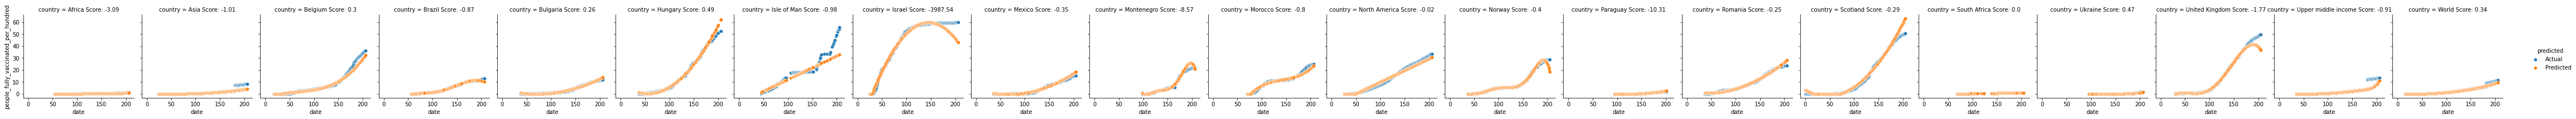

In [33]:
data = [] # Create empty list to put data to graph into
for c in datadict1.keys(): # Loop through each country
    if (datadict1[c]["model"]).getScore() < .5: # If the model is bad, add data to the list
        graphData = datadict1[c]["data"].copy() # Make a copy of the country's data
        graphData = graphData.loc[:,["date","people_fully_vaccinated_per_hundred"]] # Extract the date and fully vac columns
        graphData["predicted"] = "Actual" # Add a new column called predicted, and set these data points to Actual
        X = datadict1[c]["data"].drop("people_fully_vaccinated_per_hundred", axis=1).to_numpy().reshape(-1,1) # Extract X values (all columns except dependent)
        y = datadict1[c]["data"]["people_fully_vaccinated_per_hundred"].to_numpy() # Extract y values (fully vac column)
        predicted = datadict1[c]["model"].predict(X,y)[0] # Predict y values
        predicted = pd.DataFrame(predicted, columns=["people_fully_vaccinated_per_hundred"]) # Create a new data frame with column of people_fully_vaccinated_per_hundred
        predicted["date"] = graphData["date"].to_numpy() # Add a date column
        predicted["predicted"] = "Predicted" # Add a predicted column with "Predicted" as the values
        graphData = pd.concat([graphData,predicted]) # Combine the two Data Frames
        graphData["country"] = c + " Score: " + str(round(datadict1[c]["model"].getScore(),2)) # Add the score to the country in order to see it on the graph
        data.append(graphData) # Add graph data to the list
graph = sns.FacetGrid(pd.concat(data),col="country", hue="predicted") # Create a Facet grid to create multiple graphs
graph.map(sns.scatterplot, "date", "people_fully_vaccinated_per_hundred") # Create many different scatter plots
graph.add_legend() # Add a legend

Now let's compare this to models that did perform well.

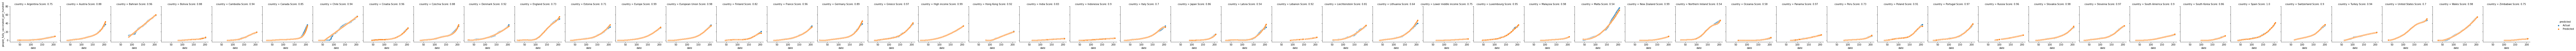

In [34]:
data = [] # Create empty list to put data to graph into
for c in datadict1.keys(): # Loop through each country
    if (datadict1[c]["model"]).getScore() >= .5: # If the model is good, add data to the list
        graphData = datadict1[c]["data"].copy() # Make a copy of the country's data
        graphData = graphData.loc[:,["date","people_fully_vaccinated_per_hundred"]] # Extract the date and fully vac columns
        graphData["predicted"] = "Actual" # Add a new column called predicted, and set these data points to Actual
        X = datadict1[c]["data"].drop("people_fully_vaccinated_per_hundred", axis=1).to_numpy().reshape(-1,1) # Extract X values (all columns except dependent)
        y = datadict1[c]["data"]["people_fully_vaccinated_per_hundred"].to_numpy() # Extract y values (fully vac column)
        predicted = datadict1[c]["model"].predict(X,y)[0] # Predict y values
        predicted = pd.DataFrame(predicted, columns=["people_fully_vaccinated_per_hundred"]) # Create a new data frame with column of people_fully_vaccinated_per_hundred
        predicted["date"] = graphData["date"].to_numpy() # Add a date column
        predicted["predicted"] = "Predicted" # Add a predicted column with "Predicted" as the values
        graphData = pd.concat([graphData,predicted]) # Combine the two Data Frames
        graphData["country"] = c + " Score: " + str(round(datadict1[c]["model"].getScore(),2)) # Add the score to the country in order to see it on the graph
        data.append(graphData) # Add graph data to the list
graph = sns.FacetGrid(pd.concat(data),col="country", hue="predicted") # Create a Facet grid to create multiple graphs
graph.map(sns.scatterplot, "date", "people_fully_vaccinated_per_hundred") # Create many different scatter plots
graph.add_legend() # Add a legend

Now let's compare this to our 2nd and 3rd models.

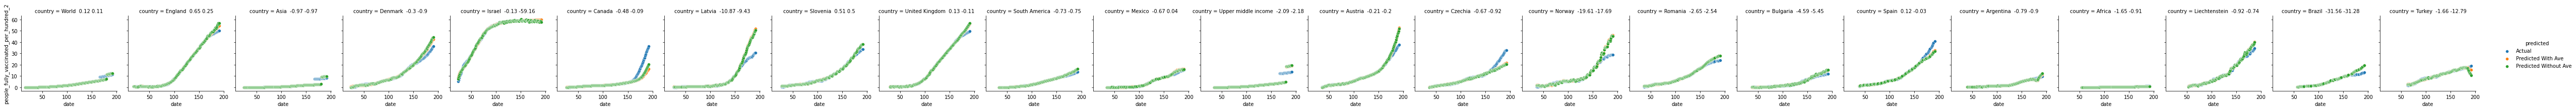

In [35]:
data = [] # Create empty list to put data to graph into
for c in datadict3.keys(): # Loop through each country
    if (datadict3[c]["model"]).getScore() < .5: # If the model is bad, add data to the list
        graphData = datadict3[c]["data"].copy() # Make a copy of the country's data
        graphData = graphData.loc[:,["date","people_fully_vaccinated_per_hundred_2"]] # Extract the date and fully vac 2 weeks later columns
        graphData["predicted"] = "Actual" # Add a new column called predicted, and set these data points to Actual
        X2 = datadict2[c]["data"].drop("people_fully_vaccinated_per_hundred_2", axis=1).to_numpy() # Extract X values (all columns except dependent)
        y2 = datadict2[c]["data"]["people_fully_vaccinated_per_hundred_2"].to_numpy() # Extract y values (fully vac 2 weeks later column)
        predicted2 = datadict2[c]["model"].predict(X2,y2)[0] # Predict y values
        predicted2 = pd.DataFrame(predicted2, columns=["people_fully_vaccinated_per_hundred_2"]) # Create a new data frame with column of people_fully_vaccinated_per_hundred_2
        predicted2["date"] = graphData["date"].to_numpy() # Add a date column
        predicted2["predicted"] = "Predicted With Ave" # Add a predicted column with "Predicted With Ave" as the values
        X3 = datadict3[c]["data"].drop("people_fully_vaccinated_per_hundred_2", axis=1).to_numpy() # Extract X values (all columns except dependent)
        y3 = datadict3[c]["data"]["people_fully_vaccinated_per_hundred_2"].to_numpy() # Extract y values (fully vac 2 weeks later column)
        predicted3 = datadict3[c]["model"].predict(X3,y3)[0] # Predict y values
        predicted3 = pd.DataFrame(predicted3, columns=["people_fully_vaccinated_per_hundred_2"]) # Create a new data frame with column of people_fully_vaccinated_per_hundred_2
        predicted3["date"] = graphData["date"].to_numpy() # Add a date column
        predicted3["predicted"] = "Predicted Without Ave" # Add a predicted column with "Predicted Without Ave" as the values
        graphData = pd.concat([graphData,predicted2,predicted3]) # Combine the three Data Frames
        graphData["country"] = c + "  " + str(round(datadict2[c]["model"].getScore(),2)) + " " + str(round(datadict3[c]["model"].getScore(),2)) # Add the scores to the country in order to see it on the graph
        data.append(graphData) # Add graph data to the list
graph = sns.FacetGrid(pd.concat(data),col="country", hue="predicted") # Create a Facet grid to create multiple graphs
graph.map(sns.scatterplot, "date", "people_fully_vaccinated_per_hundred_2") # Create many different scatter plots
graph.add_legend() # Add a legend

Let's graph the actual and predicted values for the models that have good results, greater than or equal to .5 r-squared

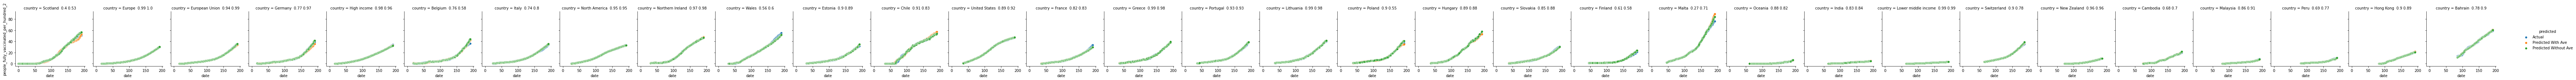

In [36]:
data = [] # Create empty list to put data to graph into
for c in datadict3.keys(): # Loop through each country
    if (datadict3[c]["model"]).getScore() >= .5: # If the model is good, add data to the list
        graphData = datadict3[c]["data"].copy() # Make a copy of the country's data
        graphData = graphData.loc[:,["date","people_fully_vaccinated_per_hundred_2"]] # Extract the date and fully vac 2 weeks later columns
        graphData["predicted"] = "Actual" # Add a new column called predicted, and set these data points to Actual
        X2 = datadict2[c]["data"].drop("people_fully_vaccinated_per_hundred_2", axis=1).to_numpy() # Extract X values (all columns except dependent)
        y2 = datadict2[c]["data"]["people_fully_vaccinated_per_hundred_2"].to_numpy() # Extract y values (fully vac 2 weeks later column)
        predicted2 = datadict2[c]["model"].predict(X2,y2)[0] # Predict y values
        predicted2 = pd.DataFrame(predicted2, columns=["people_fully_vaccinated_per_hundred_2"]) # Create a new data frame with column of people_fully_vaccinated_per_hundred_2
        predicted2["date"] = graphData["date"].to_numpy() # Add a date column
        predicted2["predicted"] = "Predicted With Ave" # Add a predicted column with "Predicted With Ave" as the values
        X3 = datadict3[c]["data"].drop("people_fully_vaccinated_per_hundred_2", axis=1).to_numpy() # Extract X values (all columns except dependent)
        y3 = datadict3[c]["data"]["people_fully_vaccinated_per_hundred_2"].to_numpy() # Extract y values (fully vac 2 weeks later column)
        predicted3 = datadict3[c]["model"].predict(X3,y3)[0] # Predict y values
        predicted3 = pd.DataFrame(predicted3, columns=["people_fully_vaccinated_per_hundred_2"]) # Create a new data frame with column of people_fully_vaccinated_per_hundred_2
        predicted3["date"] = graphData["date"].to_numpy() # Add a date column
        predicted3["predicted"] = "Predicted Without Ave" # Add a predicted column with "Predicted Without Ave" as the values
        graphData = pd.concat([graphData,predicted2,predicted3]) # Combine the three Data Frames
        graphData["country"] = c + "  " + str(round(datadict2[c]["model"].getScore(),2)) + " " + str(round(datadict3[c]["model"].getScore(),2)) # Add the scores to the country in order to see it on the graph
        data.append(graphData) # Add graph data to the list
graph = sns.FacetGrid(pd.concat(data),col="country", hue="predicted") # Create a Facet grid to create multiple graphs
graph.map(sns.scatterplot, "date", "people_fully_vaccinated_per_hundred_2") # Create many different scatter plots
graph.add_legend() # Add a legend

Looking at these graphs, we can see the overfitting part of models 2 and 3. There are many points that sporadically go up or down inside the lines, compared to the smooth lines of model 1. From this, we can see that model 1 is going to be the best choice for predicting % people fully vaccinated in the future.

Now let's see how the model would look if we trained on the whole data set.

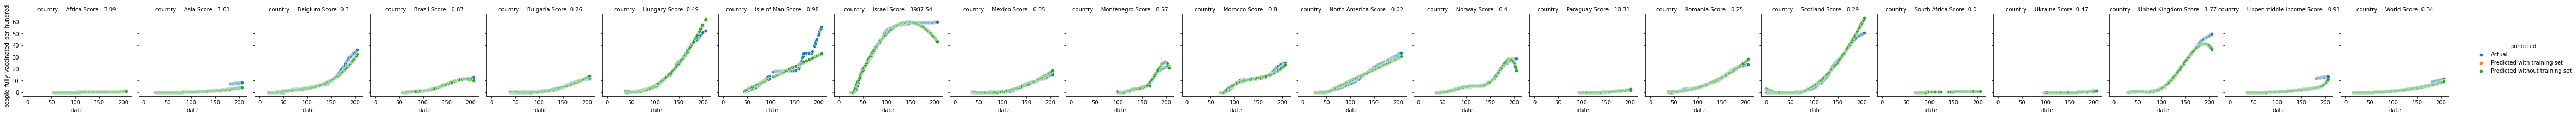

In [37]:
data = [] # Create empty list to put data to graph into
for c in datadict1.keys(): # Loop through each country
    if (datadict1[c]["model"]).getScore() < .5: # If the model is bad, add data to the list
        graphData = datadict1[c]["data"].copy() # Make a copy of the country's data
        graphData = graphData.loc[:,["date","people_fully_vaccinated_per_hundred"]] # Extract the date and fully vac columns
        graphData["predicted"] = "Actual" # Add a new column called predicted, and set these data points to Actual
        X = datadict1[c]["data"].drop("people_fully_vaccinated_per_hundred", axis=1).to_numpy().reshape(-1,1) # Extract X values (all columns except dependent)
        y = datadict1[c]["data"]["people_fully_vaccinated_per_hundred"].to_numpy() # Extract y values (fully vac column)
        predicted1 = datadict1[c]["model"].predict(X,y)[0] # Predict y values
        predicted1 = pd.DataFrame(predicted1, columns=["people_fully_vaccinated_per_hundred"]) # Create a new data frame with column of people_fully_vaccinated_per_hundred
        predicted1["date"] = graphData["date"].to_numpy() # Add a date column
        predicted1["predicted"] = "Predicted with training set" # Add a predicted column with "Predicted" as the values
        datadict1[c]["model"].finalFit(X,y) # Fit the Regression to all data
        predicted2 = datadict1[c]["model"].predict(X,y)[0] # Predict y values
        predicted2 = pd.DataFrame(predicted2, columns=["people_fully_vaccinated_per_hundred"]) # Create a new data frame with column of people_fully_vaccinated_per_hundred
        predicted2["date"] = graphData["date"].to_numpy() # Add a date column
        predicted2["predicted"] = "Predicted without training set" # Add a predicted column with "Predicted" as the values
        graphData = pd.concat([graphData,predicted1,predicted2]) # Combine the two Data Frames
        graphData["country"] = c + " Score: " + str(round(datadict1[c]["model"].getScore(),2)) # Add the score to the country in order to see it on the graph
        data.append(graphData) # Add graph data to the list
graph = sns.FacetGrid(pd.concat(data),col="country", hue="predicted") # Create a Facet grid to create multiple graphs
graph.map(sns.scatterplot, "date", "people_fully_vaccinated_per_hundred") # Create many different scatter plots
graph.add_legend() # Add a legend

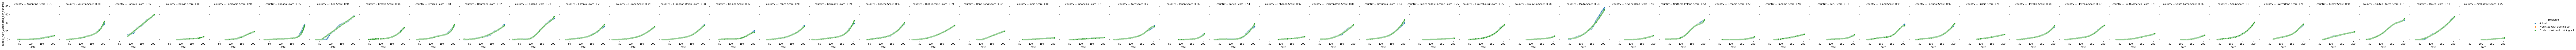

In [38]:
data = [] # Create empty list to put data to graph into
for c in datadict1.keys(): # Loop through each country
    if (datadict1[c]["model"]).getScore() >= .5: # If the model is bad, add data to the list
        graphData = datadict1[c]["data"].copy() # Make a copy of the country's data
        graphData = graphData.loc[:,["date","people_fully_vaccinated_per_hundred"]] # Extract the date and fully vac columns
        graphData["predicted"] = "Actual" # Add a new column called predicted, and set these data points to Actual
        X = datadict1[c]["data"].drop("people_fully_vaccinated_per_hundred", axis=1).to_numpy().reshape(-1,1) # Extract X values (all columns except dependent)
        y = datadict1[c]["data"]["people_fully_vaccinated_per_hundred"].to_numpy() # Extract y values (fully vac column)
        predicted1 = datadict1[c]["model"].predict(X,y)[0] # Predict y values
        predicted1 = pd.DataFrame(predicted1, columns=["people_fully_vaccinated_per_hundred"]) # Create a new data frame with column of people_fully_vaccinated_per_hundred
        predicted1["date"] = graphData["date"].to_numpy() # Add a date column
        predicted1["predicted"] = "Predicted with training set" # Add a predicted column with "Predicted" as the values
        datadict1[c]["model"].finalFit(X,y) # Fit the Regression to all data
        predicted2 = datadict1[c]["model"].predict(X,y)[0] # Predict y values
        predicted2 = pd.DataFrame(predicted2, columns=["people_fully_vaccinated_per_hundred"]) # Create a new data frame with column of people_fully_vaccinated_per_hundred
        predicted2["date"] = graphData["date"].to_numpy() # Add a date column
        predicted2["predicted"] = "Predicted without training set" # Add a predicted column with "Predicted" as the values
        graphData = pd.concat([graphData,predicted1,predicted2]) # Combine the two Data Frames
        graphData["country"] = c + " Score: " + str(round(datadict1[c]["model"].getScore(),2)) # Add the score to the country in order to see it on the graph
        data.append(graphData) # Add graph data to the list
graph = sns.FacetGrid(pd.concat(data),col="country", hue="predicted") # Create a Facet grid to create multiple graphs
graph.map(sns.scatterplot, "date", "people_fully_vaccinated_per_hundred") # Create many different scatter plots
graph.add_legend() # Add a legend

We can see that the predicted values hardly change based on being with or without the training set if the model already did well. However, if the model performed poorly before, now the model predicts much better.

Let's see how the model would predict to future dates. With our selected model.

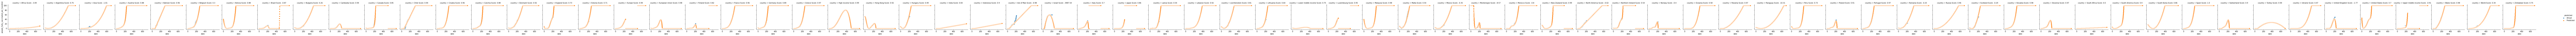

In [39]:
data = [] # Create empty list to put data to graph into
for c in datadict1.keys(): # Loop through each country
    graphData = datadict1[c]["data"].copy() # Make a copy of the country's data
    graphData = graphData.loc[:,["date","people_fully_vaccinated_per_hundred"]] # Extract the date and fully vac columns
    graphData["predicted"] = "Actual" # Add a new column called predicted, and set these data points to Actual
    X = np.array([x for x in range(700)]) # Create a range of values for almost 2 years
    predicted = datadict1[c]["model"].predictXOnly(X.reshape(-1,1)) # Predict y values
    predicted = pd.DataFrame(predicted, columns=["people_fully_vaccinated_per_hundred"]) # Create a new data frame with column of people_fully_vaccinated_per_hundred
    predicted["date"] = X # Add a date column
    predicted["predicted"] = "Predicted" # Add a predicted column with "Predicted" as the values
    graphData = pd.concat([graphData,predicted]) # Combine the two Data Frames
    graphData["country"] = c + " Score: " + str(round(datadict1[c]["model"].getScore(),2)) # Add the score to the country in order to see it on the graph
    data.append(graphData) # Add graph data to the list
graph = sns.FacetGrid(pd.concat(data),col="country", hue="predicted") # Create a Facet grid to create multiple graphs
graph.map(sns.scatterplot, "date", "people_fully_vaccinated_per_hundred") # Create many different scatter plots
graph.add_legend() # Add a legend

From these graphs, we can see that the model is going to do a really poor job of predicting. Since we know that a country will not keep the extreme rate of growth that is shown in the above predictions. For the majority of these predictions, the country will be fully vaccinated within months which we know to not be true. Plus, there are many models that go back down to 0.

Thus, with this, we know that we will not be using this model for our predictor.